In [59]:
import kagglehub
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [60]:
# Download latest version
path = kagglehub.dataset_download("arjunbhasin2013/ccdata")

print("Path to dataset files:", path)

data = pd.read_csv(path + "/CC GENERAL.csv")
data.head()

Path to dataset files: /home/hesham/.cache/kagglehub/datasets/arjunbhasin2013/ccdata/versions/1


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [62]:
# checking for duplicates
duplicates = data.duplicated()
print(f"amount of duplicated rows: {duplicates.sum()}\n")

amount of duplicated rows: 0



In [63]:
# check for nan values 
print(f"NaN values: \n{data.isna().sum()}")

NaN values: 
CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


In [64]:
# fill credit limit nan values since it only one
data['CREDIT_LIMIT'] = data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].mean())
print(f"Updated NaN values: \n{data.isna().sum()}")

Updated NaN values: 
CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          0
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


In [65]:
# drop the remaining nan values, it is a big amount so replacing can alter data!
data = data.dropna()

# drop CUST_ID column to not use it when training
data = data.drop(columns='CUST_ID')
print(f"Updated NaN values: \n{data.isna().sum()}")

Updated NaN values: 
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64


In [66]:
# randomly select subset of columns
X = data.iloc[:, :-1].sample(frac=0.5, axis=1)

# inspecting the X data to make sure that random columns are selected
X.head()

,BALANCE_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE,PURCHASES,CREDIT_LIMIT
0,0.818182,0.000000,0.083333,0.166667,0.00,0.000000,95.40,1000.0
1,0.909091,0.000000,0.000000,0.000000,0.25,6442.945483,0.00,7000.0
2,1.000000,1.000000,0.000000,1.000000,0.00,0.000000,773.17,7500.0
4,1.000000,0.083333,0.000000,0.083333,0.00,0.000000,16.00,1200.0
5,1.000000,0.000000,0.583333,0.666667,0.00,0.000000,1333.28,1800.0


In [67]:
Y = data.iloc[:, -1]
Y.head()

0    12
1    12
2    12
4    12
5    12
Name: TENURE, dtype: int64

In [70]:
# training the model, since it is unsupervised learning we don't need to use the Y data
model = KMeans(n_clusters=3)
model.fit(X)

# Clustering resuls and WCSS
print(f"Clusters: {model.labels_}")
print(f"WCSS: {model.inertia_}")

Clusters: [1 2 0 ... 1 1 1]
WCSS: 91804881782.21698


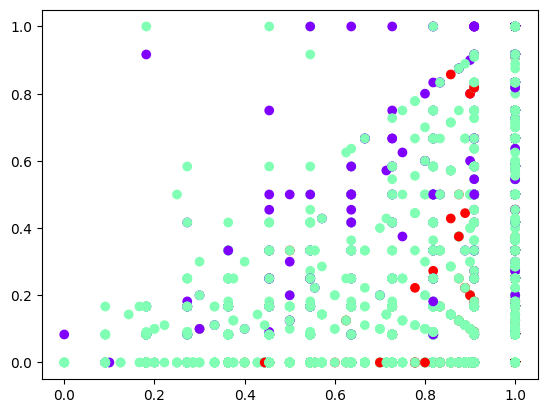

In [71]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=model.labels_, cmap='rainbow')